In [11]:
import pandas as pd
avengers = pd.read_csv('avengers-data2.csv', sep='\t')
avengers.head(2)

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes,Unnamed: 21
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...,NaN
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...,NaN


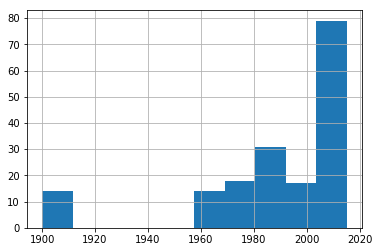

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

avengers['Year'].hist()

In [18]:
print(avengers.shape[0])
true_avengers = avengers[avengers['Year'] > 1959]
true_avengers.shape[0]

173


159

In [38]:
col = ['Death1','Death2','Death3','Death4','Death5']
def count_deaths(row):
    value_count = row[col].value_counts()
    try:
        return value_count['YES']
    except Exception as ex:
        return 0
       
true_avengers['Deaths'] = true_avengers.apply(count_deaths,axis=1)
col.append('Deaths')
true_avengers[col].head(5)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Death1,Death2,Death3,Death4,Death5,Deaths
0,YES,NaN,NaN,NaN,NaN,1
1,YES,NaN,NaN,NaN,NaN,1
2,YES,NaN,NaN,NaN,NaN,1
3,YES,NaN,NaN,NaN,NaN,1
4,YES,YES,NaN,NaN,NaN,2


In [41]:
joined_accuracy_count  = int()

correct_years_joining = true_avengers[(2015 - true_avengers['Year']) == true_avengers['Years since joining']]

joined_accuracy_count = correct_years_joining.shape[0]   
joined_accuracy_count

159